<a href="https://colab.research.google.com/github/anishdevadiga/Machine_Learning/blob/main/week9diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/My Drive/datasets/daat/diabetes.csv')


In [5]:
print("Data Dimensions:", df.shape)
print("First few rows:\n", df.head())
print("Column Names:\n", df.columns)

Data Dimensions: (768, 9)
First few rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Column Names:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [6]:
distribution = df['Outcome'].value_counts(normalize=True) * 100
print("Target column distribution:\n", distribution)

Target column distribution:
 Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


In [7]:
print("Dataset Summary:\n", df.describe())
print("Information:\n", df.info())

Dataset Summary:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000

In [8]:
# 5. Explore Missing Values and Outliers
print("Missing values:\n", df.isnull().sum())

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Numerical Summary:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0000

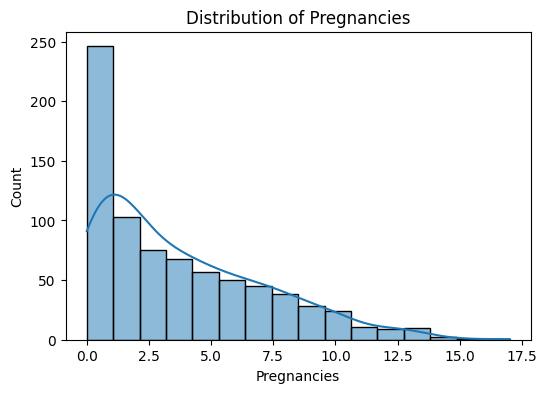

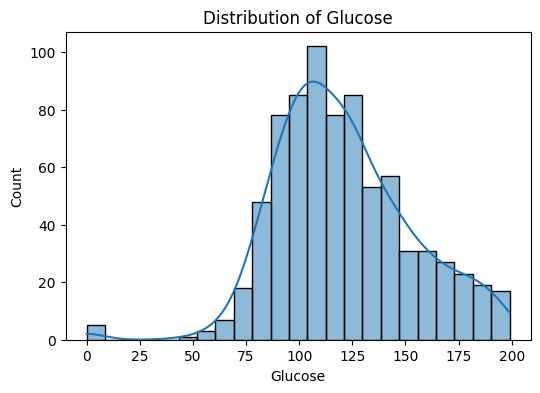

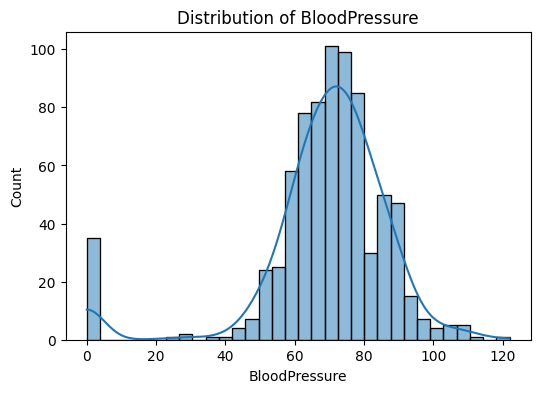

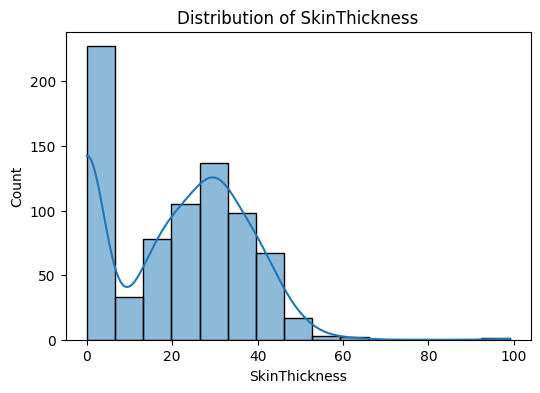

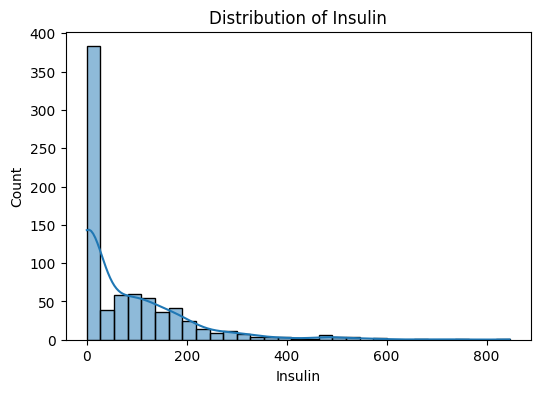

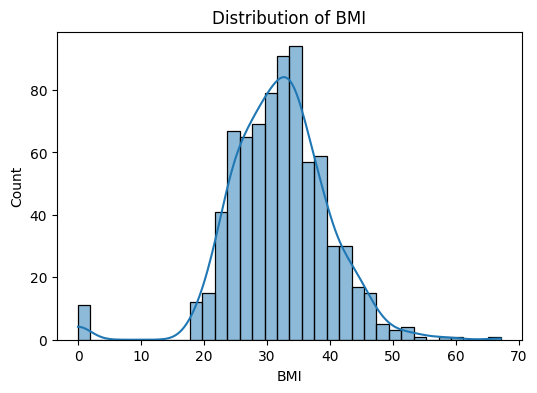

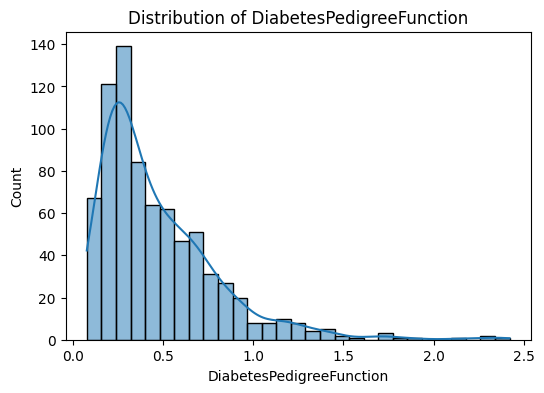

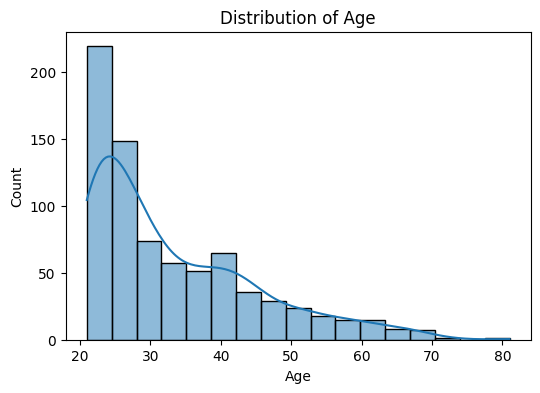

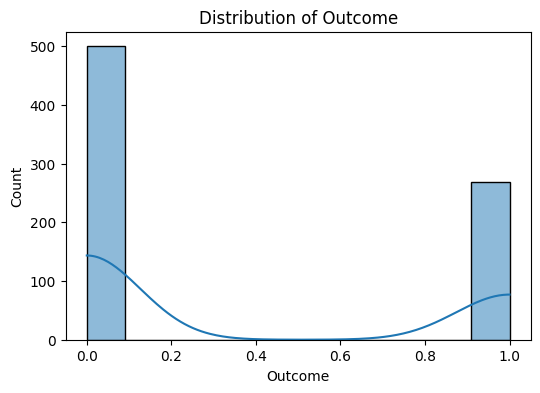

In [9]:
# 6. Check Distribution of Variables
numeric_features = df.select_dtypes(include=[np.number]).columns
print("Numerical Summary:\n", df[numeric_features].describe())
for column in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

In [10]:
X = df.drop(columns="Outcome")
y = df['Outcome']               # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
svm_default = SVC()
svm_default.fit(X_train, y_train)
y_pred_default = svm_default.predict(X_test)
print('Default SVM accuracy:', accuracy_score(y_test, y_pred_default))

Default SVM accuracy: 0.7532467532467533


In [12]:
#9 Evaluate RBF kernel SVM with different C values
for c in [1.0, 100.0, 1000.0]:
    svm_rbf = SVC(kernel='rbf', C=c, gamma='auto')
    svm_rbf.fit(X_train, y_train)
    y_pred_rbf = svm_rbf.predict(X_test)
    print(f"RBF kernel Accuracy with C={c}:", accuracy_score(y_test, y_pred_rbf))

RBF kernel Accuracy with C=1.0: 0.6796536796536796
RBF kernel Accuracy with C=100.0: 0.6796536796536796
RBF kernel Accuracy with C=1000.0: 0.6796536796536796


In [13]:
# 10. Linear Kernel SVM with Different C Values
for C in [1.0, 100.0, 1000.0]:
    svm_linear = SVC(kernel='linear', C=C)
    svm_linear.fit(X_train, y_train)
    y_pred_linear = svm_linear.predict(X_test)
    print(f"Linear Kernel SVM Accuracy with C={C}:", accuracy_score(y_test, y_pred_linear))

Linear Kernel SVM Accuracy with C=1.0: 0.7835497835497836
Linear Kernel SVM Accuracy with C=100.0: 0.7619047619047619
Linear Kernel SVM Accuracy with C=1000.0: 0.7575757575757576


In [16]:
#11 Polynomial Kernel SVM with Different C Values
for C in [1.0, 100.0, 1000.0]:
    svm_poly = SVC(kernel='poly', C=C)
    svm_poly.fit(X_train, y_train)
    y_pred_poly = svm_poly.predict(X_test)
    print(f"Polynomial Kernel SVM Accuracy with C={C}:", accuracy_score(y_test, y_pred_poly))

Polynomial Kernel SVM Accuracy with C=1.0: 0.7445887445887446
Polynomial Kernel SVM Accuracy with C=100.0: 0.7748917748917749
Polynomial Kernel SVM Accuracy with C=1000.0: 0.7316017316017316


In [17]:
# 12. Sigmoid Kernel SVM with Different C Values
for C in [1.0, 100.0, 1000.0]:
    svm_sigmoid = SVC(kernel='sigmoid', C=C)
    svm_sigmoid.fit(X_train, y_train)
    y_pred_sigmoid = svm_sigmoid.predict(X_test)
    print(f"Sigmoid Kernel SVM Accuracy with C={C}:", accuracy_score(y_test, y_pred_sigmoid))

Sigmoid Kernel SVM Accuracy with C=1.0: 0.5064935064935064
Sigmoid Kernel SVM Accuracy with C=100.0: 0.45454545454545453
Sigmoid Kernel SVM Accuracy with C=1000.0: 0.45454545454545453


In [18]:
#13 Train-set and Test-set Accuracy (example with RBF kernel, C=1)
train_accuracy = accuracy_score(y_train, svm_rbf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_rbf)
print("Train-set Accuracy (RBF, C=1):", train_accuracy)
print("Test-set Accuracy (RBF, C=1):", test_accuracy)




Train-set Accuracy (RBF, C=1): 1.0
Test-set Accuracy (RBF, C=1): 0.6796536796536796


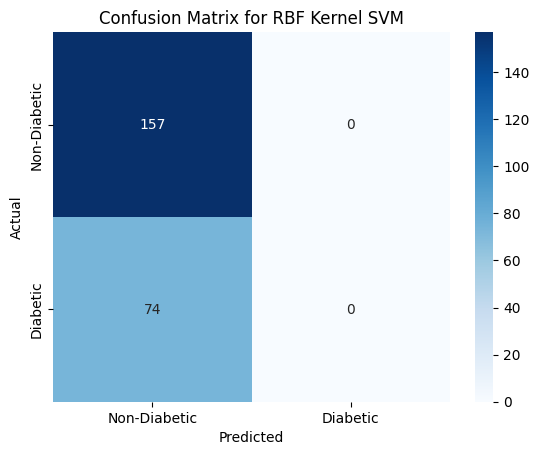

In [19]:
# 14. Confusion Matrix for RBF Kernel SVM
conf_matrix = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RBF Kernel SVM')
plt.show()

In [20]:

# 15. Classification Report for RBF Kernel
print("Classification Report:\n", classification_report(y_test, y_pred_rbf, target_names=['Non-Diabetic', 'Diabetic']))

# 16. Evaluate Classification Accuracy and Error
classification_accuracy = accuracy_score(y_test, y_pred_rbf)
classification_error = 1 - classification_accuracy
print("Classification Accuracy:", classification_accuracy)
print("Classification Error:", classification_error)

Classification Report:
               precision    recall  f1-score   support

Non-Diabetic       0.68      1.00      0.81       157
    Diabetic       0.00      0.00      0.00        74

    accuracy                           0.68       231
   macro avg       0.34      0.50      0.40       231
weighted avg       0.46      0.68      0.55       231

Classification Accuracy: 0.6796536796536796
Classification Error: 0.3203463203463204


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
